# Ensemble canonico con l'algoritmo di Metropolis #
In questa lezione si è tentato di utilizzare l'algoritmo di Metropolis per eseguire una trattazione di meccanica statistica su un ensemble NVT (numero di particelle, volume e temperature fissati). In particolare, ci si è dapprima soffermati su uno studio dei problemi legati alla correlazione delle misure generate dall'algoritmo di Metropolis e quindi sulla necessità di una tecnica di blocking per la trattazione dei dati ottenuti e una trattazione sensata delle incertezze. 

In tutti i casi il sistema è stato precedentemente equilibrato usando una simulazione più corta (ca. $10^4$ passi Metropolis) e riavviando a partire dal suo risultato finale.

Laddove non altrimenti indicato, tutti i dati sono espressi in unità di Lennard-Jones.

<b>NOTA</b> Anche se è piuttosto antiestetico, ho preferito suddividere il codice in modo che ogni blocco esegua l'analisi solo di una parte. La ragione è legata al fatto che le analisi dati tendono ad essere piuttosto lunghe, e in questa maniera l'utente può scegliere di ricalcolare solo i risultati di suo interesse.

# Stato liquido
In questo stato si sono inseriti i seguenti dati iniziali:

temperatura = 1.1 

numero particelle = 108

densità = 0.8

cutoff del potenziale = 2.5

massima mossa Metropolis = 0.2

La dimensione della mossa Metropolis garantisce un adeguato bilanciamento della probabilità di accettazione intorno al 50%, come da regola empirica.

## Autocorrelazione energia potenziale

Valor medio: -0.5058096919999998
Varianza: 2.303542336376965
Valore del tempo di correlazione: 19.678482898967665


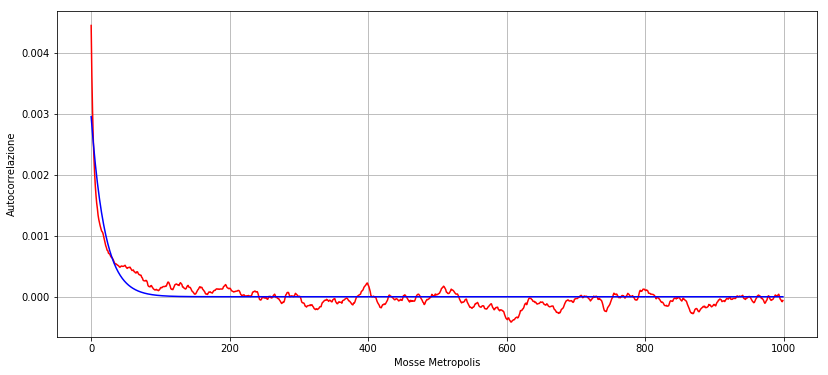

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

def f(x,A,tc):  # defining the fitting function
    return A * np.exp(-x/tc)

fig=plt.figure(figsize=(30,6))                     #sx: larghezza; dx: Lunghezza

# Importo i dati della energia potenziale per particella.
n, u = np.loadtxt("energia_istantanea_liquido.dat", usecols=(0,1), delimiter='   ', unpack='true')
# A questo punto ho negli array i dati della energia potenziale per particella. 

tmax = 10000
t_interest =  1000

# Calcolo il valor medio dell'array.
accu=0
accu2=0
valori=range(0,t_interest)
for i in valori:
    accu = accu + u[i]
    accu2 = accu2 + u[i] * u[i]

# Alla fine divido per il numero di misure.
media = accu/tmax
varianza = accu2/tmax - media * media
print("Valor medio: " + str(media))
print("Varianza: " + str(varianza))



# Da qui calcolo la funzione di autocorrelazione.
chi = np.zeros(t_interest)
n2 = np.zeros(t_interest)
# Ciclo sui valori di t
for t in valori:
    # Range in cui puo' variare t'=tp
    valoriP =  range(0,tmax-t)
    # Queste variabili contengono i risultati delle sommatorie.
    sommatoria1=0
    sommatoria2=0
    sommatoria3=0
    for tp in valoriP:
        sommatoria1 = sommatoria1 + u[tp] * u[tp+t]
        sommatoria2 = sommatoria2 + u[tp]
        sommatoria3 = sommatoria3 + u[tp+t]
    chi[t] = 1/(tmax-t)*sommatoria1 - 1/(tmax-t)*sommatoria2 * 1/(tmax-t)*sommatoria3
    chi[t] = chi[t]/varianza
    n2[t]=t

p_opt, p_cov = curve_fit(f, n2, chi)
print("Valore del tempo di correlazione: " + str(p_opt[1]))
chi_fit = np.zeros(t_interest)
for t in valori:
    chi_fit[t] = f(t,p_opt[0],p_opt[1])

plt.subplot(1,2,1)
plt.plot(chi, color='r')
plt.plot(chi_fit, color='b')
plt.grid(True)
plt.xlabel("Mosse Metropolis")
plt.ylabel("Autocorrelazione")

plt.show()

## Autocorrelazione pressione

Valor medio: 0.19926426390000018
Varianza: 0.3774987573713817
Valore del tempo di correlazione: 23.38409481085908


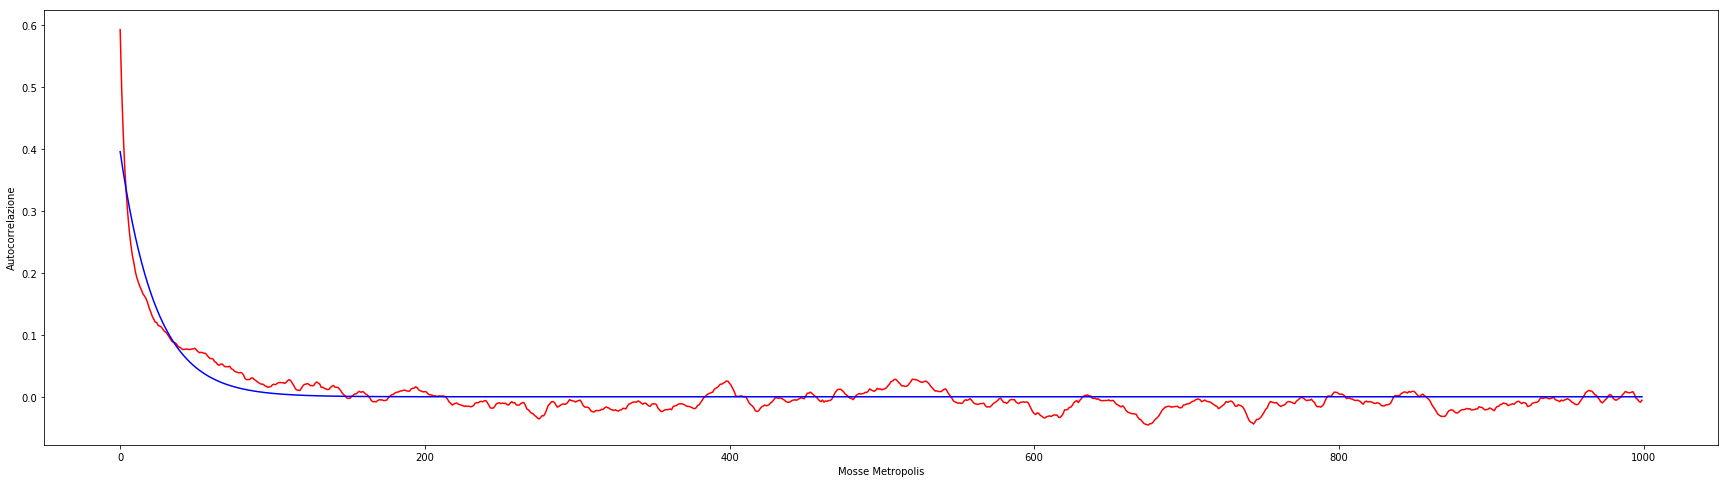

In [6]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

fig=plt.figure(figsize=(30,8))                     #sx: larghezza; dx: Lunghezza


def f(x,A,tc):  # defining the fitting function
    return A * np.exp(-x/tc)

# Importo i dati della energia potenziale per particella.
n, u = np.loadtxt("P_istantanea_liquido.dat", usecols=(0,1), delimiter='   ', unpack='true')
# A questo punto ho negli array i dati della energia potenziale per particella. 

tmax = 10000
t_interest =  1000

# Calcolo il valor medio dell'array.
accu=0
accu2=0
valori=range(0,t_interest)
for i in valori:
    accu = accu + u[i]
    accu2 = accu2 + u[i] * u[i]

# Alla fine divido per il numero di misure.
media = accu/tmax
varianza = accu2/tmax - media * media
print("Valor medio: " + str(media))
print("Varianza: " + str(varianza))



# Da qui calcolo la funzione di autocorrelazione.
chi = np.zeros(t_interest)
n2 = np.zeros(t_interest)
# Ciclo sui valori di t
for t in valori:
    # Range in cui puo' variare t'=tp
    valoriP =  range(0,tmax-t)
    # Queste variabili contengono i risultati delle sommatorie.
    sommatoria1=0
    sommatoria2=0
    sommatoria3=0
    for tp in valoriP:
        sommatoria1 = sommatoria1 + u[tp] * u[tp+t]
        sommatoria2 = sommatoria2 + u[tp]
        sommatoria3 = sommatoria3 + u[tp+t]
    chi[t] = 1/(tmax-t)*sommatoria1 - 1/(tmax-t)*sommatoria2 * 1/(tmax-t)*sommatoria3
    chi[t] = chi[t]/varianza
    n2[t]=t

p_opt, p_cov = curve_fit(f, n2, chi)
print("Valore del tempo di correlazione: " + str(p_opt[1]))
chi_fit = np.zeros(t_interest)
for t in valori:
    chi_fit[t] = f(t,p_opt[0],p_opt[1])

plt.plot(chi, color='r')
plt.plot(chi_fit, color='b')
plt.xlabel("Mosse Metropolis")
plt.ylabel("Autocorrelazione")
plt.show()

## Studio della dimensione dei blocchi

In [7]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

fig=plt.figure(figsize=(30,6))                     #sx: larghezza; dx: Lunghezza

def error(AV,AV2,n):  # Function for statistical uncertainty estimation
    if n==0:
        return 0
    else:
        return math.sqrt((AV2[n] - AV[n]**2)/n)

    
    
def blocking(arr_ave, quanti_dati):
    # Creo gli appropriati array del blocking.
    sum_prog = np.zeros(quanti_dati)
    su2_prog = np.zeros(quanti_dati)
    err_prog = np.zeros(quanti_dati)
    arr_ave2 = np.zeros(quanti_dati)
    
    # Array delle medie quadrate per blocco.
    for i in range(0,quanti_dati):
        arr_ave2[i] = arr_ave[i] * arr_ave[i]
    
    # print("Terminato calcolo medie quadrate.")
    
    for i in range(quanti_dati):
        for j in range(i+1):
            sum_prog[i] += arr_ave[j] 
            su2_prog[i] += arr_ave2[j] 
        sum_prog[i]/=(i+1) # Cumulative average
        su2_prog[i]/=(i+1) # Cumulative square average
        err_prog[i] = error(sum_prog,su2_prog,i)
        
        #if i % 500 == 0:
        #  print("Terminato calcolo blocking per blocco " + str(i) + ".")
    
    # Ritorna l'ultimo valore dell'errore.
    return err_prog[quanti_dati-1]
        
# Importo i dati della energia potenziale per particella.
n, u = np.loadtxt("energia_istantanea_liquido.dat", usecols=(0,1), delimiter='   ', unpack='true')
# A questo punto ho negli array i dati della energia potenziale per particella. 

print("Terminato caricamento dei dati.")

n_data = 100000    # Numero totale di dati.
step_dimensione = 10    # Step dimensione del blocco.
min_dimensione = 10    # Dimensione minima del blocco.
tentativi_dimensione = 100    # Quanti tentativi di blocking devo fare?

# In questo array salvo i risultati man mano ottenuti come errori finali.
arr_risultati = np.zeros(tentativi_dimensione)

# In questo array salvo i valori delle L utilizzati.
arr_L = np.zeros(tentativi_dimensione)

file = open("variazione_con_L_liquido.dat","w")

# Questo ciclo cicla sul valore di L (larghezza del blocco)
for i in range(0,tentativi_dimensione):
    # Imposta correttamente la dimensione del blocco in base al tentativo.
    L = min_dimensione + step_dimensione * i
    # Determina quanti blocchi ci sono.
    quanti_blocchi = int(n_data / L)
    print("Con L =" + str(L) + " ho " + str(quanti_blocchi) + " blocchi.")
    
    # Imposta l'array dove salvare le medie.
    arr_ave = np.zeros(quanti_blocchi)
    
    # Questo ciclo cicla sui blocchi.    
    for blk in range(0,quanti_blocchi):
        # Questo ciclo cicla sulle singole misure.
        for mis in range(0,L):
            arr_ave[blk] = arr_ave[blk] + u[mis + blk * L]    # Aggiunge la misura attuale all'accumulatore.
            
        # Alla fine medio.
        arr_ave[blk] = arr_ave[blk]/L
        # Stampo ogni 1000 blocchi.
        # if blk % 1000 == 0:
        #    print("Blocco " + str(blk) + " con L = " + str(L) + " : media fatta.")
    
    # Alla fine ho tutte le medie. La funzione blocking mi restituisce il valore dell'errore.
#    print("Finito blocco con L=" + str(L) + ". Avvio blocking.")
    arr_risultati[i] = blocking(arr_ave, quanti_blocchi)
    arr_L[i] = L
    print("Eseguito tentativo con L=" + str(L) + ":      errore = " + str(arr_risultati[i]))
    file.write(str(arr_L[i]) + "   " + str(arr_risultati[i]) + '\n')
    print("Scritto su file.")

file.close()

Terminato caricamento dei dati.
Con L =10 ho 10000 blocchi.
Eseguito tentativo con L=10:      errore = 0.0007744779460248682
Scritto su file.
Con L =20 ho 5000 blocchi.
Eseguito tentativo con L=20:      errore = 0.0009566341086972252
Scritto su file.
Con L =30 ho 3333 blocchi.
Eseguito tentativo con L=30:      errore = 0.0010665767749612174
Scritto su file.
Con L =40 ho 2500 blocchi.
Eseguito tentativo con L=40:      errore = 0.0011566003709914136
Scritto su file.
Con L =50 ho 2000 blocchi.
Eseguito tentativo con L=50:      errore = 0.001220388015976128
Scritto su file.
Con L =60 ho 1666 blocchi.
Eseguito tentativo con L=60:      errore = 0.0012617051127410835
Scritto su file.
Con L =70 ho 1428 blocchi.
Eseguito tentativo con L=70:      errore = 0.0013130644986455715
Scritto su file.
Con L =80 ho 1250 blocchi.
Eseguito tentativo con L=80:      errore = 0.0013540648207101874
Scritto su file.
Con L =90 ho 1111 blocchi.
Eseguito tentativo con L=90:      errore = 0.0013979697025693768
Scri

Con L =770 ho 129 blocchi.
Eseguito tentativo con L=770:      errore = 0.00178407567367489
Scritto su file.
Con L =780 ho 128 blocchi.
Eseguito tentativo con L=780:      errore = 0.0017480537345254533
Scritto su file.
Con L =790 ho 126 blocchi.
Eseguito tentativo con L=790:      errore = 0.001685951739118334
Scritto su file.
Con L =800 ho 125 blocchi.
Eseguito tentativo con L=800:      errore = 0.0017845450960177478
Scritto su file.
Con L =810 ho 123 blocchi.
Eseguito tentativo con L=810:      errore = 0.0016998375441936513
Scritto su file.
Con L =820 ho 121 blocchi.
Eseguito tentativo con L=820:      errore = 0.001692955757691184
Scritto su file.
Con L =830 ho 120 blocchi.
Eseguito tentativo con L=830:      errore = 0.001722902859607227
Scritto su file.
Con L =840 ho 119 blocchi.
Eseguito tentativo con L=840:      errore = 0.0018235977768920558
Scritto su file.
Con L =850 ho 117 blocchi.
Eseguito tentativo con L=850:      errore = 0.0018029919163842158
Scritto su file.
Con L =860 ho 1

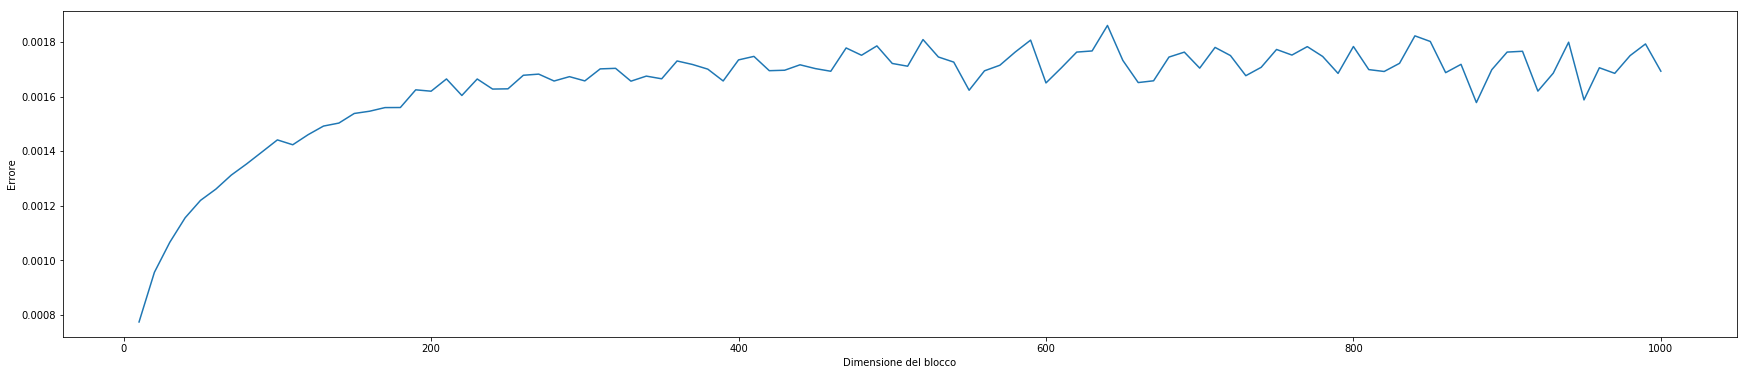

In [8]:
# Visto il notevole tempo di esecuzione del codice precedente, il codice di stampa del grafico è qui.
# I dati del codice precedente vengono salvati su file.

L, err = np.loadtxt("variazione_con_L_liquido.dat", usecols=(0,1), delimiter='   ', unpack='true')

plt.plot(L,err)
plt.xlabel("Dimensione del blocco")
plt.ylabel("Errore")

plt.show()

Osservo che una volta che la larghezza del blocco è sufficiente, il miglioramento che si ottiene è del tutto irrilevante. Considerato questo grafico, ritengo che per un liquido sia opportuno fissare la larghezza del blocco intorno a 400. 

# Stato solido
In questo stato si sono inseriti i seguenti dati iniziali:

Temperatura = 0.8

Numero di particelle = 108

Densità = 1.1

Cutoff del potenziale = 2.2

Massima mossa Metropolis = 0.12

Anche in questo caso questa scelta della mossa Metropolis garantisce una accettazione appena sotto il 50%

## Autocorrelazione energia potenziale

Valor medio: -0.6705546100000003
Varianza: 4.0475262569487045
Valore del tempo di correlazione: 9.193649825644325


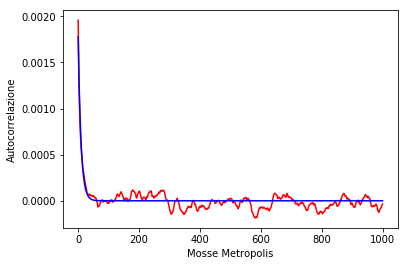

In [9]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

def f(x,A,tc):  # defining the fitting function
    return A * np.exp(-x/tc)

# Importo i dati della energia potenziale per particella.
n, u = np.loadtxt("energia_istantanea_solido.dat", usecols=(0,1), delimiter='   ', unpack='true')
# A questo punto ho negli array i dati della energia potenziale per particella. 

tmax = 10000
t_interest =  1000

# Calcolo il valor medio dell'array.
accu=0
accu2=0
valori=range(0,t_interest)
for i in valori:
    accu = accu + u[i]
    accu2 = accu2 + u[i] * u[i]

# Alla fine divido per il numero di misure.
media = accu/tmax
varianza = accu2/tmax - media * media
print("Valor medio: " + str(media))
print("Varianza: " + str(varianza))



# Da qui calcolo la funzione di autocorrelazione.
chi = np.zeros(t_interest)
n2 = np.zeros(t_interest)
# Ciclo sui valori di t
for t in valori:
    # Range in cui puo' variare t'=tp
    valoriP =  range(0,tmax-t)
    # Queste variabili contengono i risultati delle sommatorie.
    sommatoria1=0
    sommatoria2=0
    sommatoria3=0
    for tp in valoriP:
        sommatoria1 = sommatoria1 + u[tp] * u[tp+t]
        sommatoria2 = sommatoria2 + u[tp]
        sommatoria3 = sommatoria3 + u[tp+t]
    chi[t] = 1/(tmax-t)*sommatoria1 - 1/(tmax-t)*sommatoria2 * 1/(tmax-t)*sommatoria3
    chi[t] = chi[t]/varianza
    n2[t]=t

p_opt, p_cov = curve_fit(f, n2, chi)
print("Valore del tempo di correlazione: " + str(p_opt[1]))
chi_fit = np.zeros(t_interest)
for t in valori:
    chi_fit[t] = f(t,p_opt[0],p_opt[1])

plt.plot(chi, color='r')
plt.plot(chi_fit, color='b')
plt.xlabel("Mosse Metropolis")
plt.ylabel("Autocorrelazione")
plt.show()

## Autocorrelazione pressione

Valor medio: 0.936919702
Varianza: 7.923041410186824
Valore del tempo di correlazione: 8.966525118453722


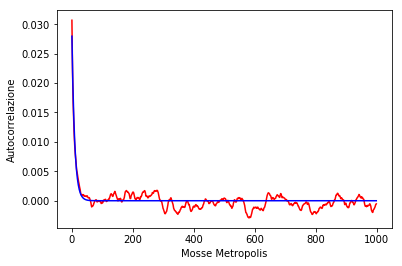

In [10]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

def f(x,A,tc):  # defining the fitting function
    return A * np.exp(-x/tc)

# Importo i dati della energia potenziale per particella.
n, u = np.loadtxt("P_istantanea_solido.dat", usecols=(0,1), delimiter='   ', unpack='true')
# A questo punto ho negli array i dati della energia potenziale per particella. 

tmax = 10000
t_interest =  1000

# Calcolo il valor medio dell'array.
accu=0
accu2=0
valori=range(0,t_interest)
for i in valori:
    accu = accu + u[i]
    accu2 = accu2 + u[i] * u[i]

# Alla fine divido per il numero di misure.
media = accu/tmax
varianza = accu2/tmax - media * media
print("Valor medio: " + str(media))
print("Varianza: " + str(varianza))



# Da qui calcolo la funzione di autocorrelazione.
chi = np.zeros(t_interest)
n2 = np.zeros(t_interest)
# Ciclo sui valori di t
for t in valori:
    # Range in cui puo' variare t'=tp
    valoriP =  range(0,tmax-t)
    # Queste variabili contengono i risultati delle sommatorie.
    sommatoria1=0
    sommatoria2=0
    sommatoria3=0
    for tp in valoriP:
        sommatoria1 = sommatoria1 + u[tp] * u[tp+t]
        sommatoria2 = sommatoria2 + u[tp]
        sommatoria3 = sommatoria3 + u[tp+t]
    chi[t] = 1/(tmax-t)*sommatoria1 - 1/(tmax-t)*sommatoria2 * 1/(tmax-t)*sommatoria3
    chi[t] = chi[t]/varianza
    n2[t]=t

p_opt, p_cov = curve_fit(f, n2, chi)
print("Valore del tempo di correlazione: " + str(p_opt[1]))
chi_fit = np.zeros(t_interest)
for t in valori:
    chi_fit[t] = f(t,p_opt[0],p_opt[1])

plt.plot(chi, color='r')
plt.plot(chi_fit, color='b')
plt.xlabel("Mosse Metropolis")
plt.ylabel("Autocorrelazione")
plt.show()

## Studio della dimensione dei blocchi

In [11]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

fig=plt.figure(figsize=(15,7))

def error(AV,AV2,n):  # Function for statistical uncertainty estimation
    if n==0:
        return 0
    else:
        return math.sqrt((AV2[n] - AV[n]**2)/n)

    
    
def blocking(arr_ave, quanti_dati):
    # Creo gli appropriati array del blocking.
    sum_prog = np.zeros(quanti_dati)
    su2_prog = np.zeros(quanti_dati)
    err_prog = np.zeros(quanti_dati)
    arr_ave2 = np.zeros(quanti_dati)
    
    # Array delle medie quadrate per blocco.
    for i in range(0,quanti_dati):
        arr_ave2[i] = arr_ave[i] * arr_ave[i]
    
    # print("Terminato calcolo medie quadrate.")
    
    for i in range(quanti_dati):
        for j in range(i+1):
            sum_prog[i] += arr_ave[j] 
            su2_prog[i] += arr_ave2[j] 
        sum_prog[i]/=(i+1) # Cumulative average
        su2_prog[i]/=(i+1) # Cumulative square average
        err_prog[i] = error(sum_prog,su2_prog,i)
        
        #if i % 500 == 0:
        #  print("Terminato calcolo blocking per blocco " + str(i) + ".")
    
    # Ritorna l'ultimo valore dell'errore.
    return err_prog[quanti_dati-1]
        
# Importo i dati della energia potenziale per particella.
n, u = np.loadtxt("energia_istantanea_liquido.dat", usecols=(0,1), delimiter='   ', unpack='true')
# A questo punto ho negli array i dati della energia potenziale per particella. 

print("Terminato caricamento dei dati.")

n_data = 100000    # Numero totale di dati.
step_dimensione = 10    # Step dimensione del blocco.
min_dimensione = 10    # Dimensione minima del blocco.
tentativi_dimensione = 100    # Quanti tentativi di blocking devo fare?

# In questo array salvo i risultati man mano ottenuti come errori finali.
arr_risultati = np.zeros(tentativi_dimensione)

# In questo array salvo i valori delle L utilizzati.
arr_L = np.zeros(tentativi_dimensione)

file = open("variazione_con_L_solido.dat","w")

# Questo ciclo cicla sul valore di L (larghezza del blocco)
for i in range(0,tentativi_dimensione):
    # Imposta correttamente la dimensione del blocco in base al tentativo.
    L = min_dimensione + step_dimensione * i
    # Determina quanti blocchi ci sono.
    quanti_blocchi = int(n_data / L)
    print("Con L =" + str(L) + " ho " + str(quanti_blocchi) + " blocchi.")
    
    # Imposta l'array dove salvare le medie.
    arr_ave = np.zeros(quanti_blocchi)
    
    # Questo ciclo cicla sui blocchi.    
    for blk in range(0,quanti_blocchi):
        # Questo ciclo cicla sulle singole misure.
        for mis in range(0,L):
            arr_ave[blk] = arr_ave[blk] + u[mis + blk * L]    # Aggiunge la misura attuale all'accumulatore.
            
        # Alla fine medio.
        arr_ave[blk] = arr_ave[blk]/L
        # Stampo ogni 1000 blocchi.
        # if blk % 1000 == 0:
        #    print("Blocco " + str(blk) + " con L = " + str(L) + " : media fatta.")
    
    # Alla fine ho tutte le medie. La funzione blocking mi restituisce il valore dell'errore.
#    print("Finito blocco con L=" + str(L) + ". Avvio blocking.")
    arr_risultati[i] = blocking(arr_ave, quanti_blocchi)
    arr_L[i] = L
    print("Eseguito tentativo con L=" + str(L) + ":      errore = " + str(arr_risultati[i]))
    file.write(str(arr_L[i]) + "   " + str(arr_risultati[i]) + '\n')
    print("Scritto su file.")

file.close()

Terminato caricamento dei dati.
Con L =10 ho 10000 blocchi.
Eseguito tentativo con L=10:      errore = 0.0007744779460248682
Scritto su file.
Con L =20 ho 5000 blocchi.
Eseguito tentativo con L=20:      errore = 0.0009566341086972252
Scritto su file.
Con L =30 ho 3333 blocchi.
Eseguito tentativo con L=30:      errore = 0.0010665767749612174
Scritto su file.
Con L =40 ho 2500 blocchi.
Eseguito tentativo con L=40:      errore = 0.0011566003709914136
Scritto su file.
Con L =50 ho 2000 blocchi.
Eseguito tentativo con L=50:      errore = 0.001220388015976128
Scritto su file.
Con L =60 ho 1666 blocchi.
Eseguito tentativo con L=60:      errore = 0.0012617051127410835
Scritto su file.
Con L =70 ho 1428 blocchi.
Eseguito tentativo con L=70:      errore = 0.0013130644986455715
Scritto su file.
Con L =80 ho 1250 blocchi.
Eseguito tentativo con L=80:      errore = 0.0013540648207101874
Scritto su file.
Con L =90 ho 1111 blocchi.
Eseguito tentativo con L=90:      errore = 0.0013979697025693768
Scri

Con L =780 ho 128 blocchi.
Eseguito tentativo con L=780:      errore = 0.0017480537345254533
Scritto su file.
Con L =790 ho 126 blocchi.
Eseguito tentativo con L=790:      errore = 0.001685951739118334
Scritto su file.
Con L =800 ho 125 blocchi.
Eseguito tentativo con L=800:      errore = 0.0017845450960177478
Scritto su file.
Con L =810 ho 123 blocchi.
Eseguito tentativo con L=810:      errore = 0.0016998375441936513
Scritto su file.
Con L =820 ho 121 blocchi.
Eseguito tentativo con L=820:      errore = 0.001692955757691184
Scritto su file.
Con L =830 ho 120 blocchi.
Eseguito tentativo con L=830:      errore = 0.001722902859607227
Scritto su file.
Con L =840 ho 119 blocchi.
Eseguito tentativo con L=840:      errore = 0.0018235977768920558
Scritto su file.
Con L =850 ho 117 blocchi.
Eseguito tentativo con L=850:      errore = 0.0018029919163842158
Scritto su file.
Con L =860 ho 116 blocchi.
Eseguito tentativo con L=860:      errore = 0.0016886889861660397
Scritto su file.
Con L =870 ho

<Figure size 1080x504 with 0 Axes>

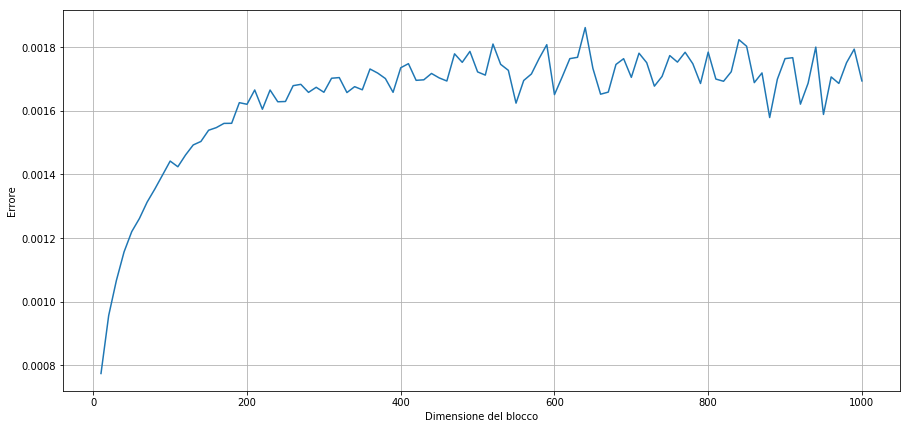

In [12]:
# Visto il notevole tempo di esecuzione del codice precedente, il codice di stampa del grafico è qui.
# I dati del codice precedente vengono salvati su file.

L, err = np.loadtxt("variazione_con_L_solido.dat", usecols=(0,1), delimiter='   ', unpack='true')

fig=plt.figure(figsize=(15,7))

plt.plot(L,err)
plt.xlabel("Dimensione del blocco")
plt.ylabel("Errore")
plt.grid(True)

plt.show()

Osservo che l'errore raggiunge un comportamento stazionario dopo circa una larghezza di 500 step Montecarlo per ogni blocco.

# Stato gassoso
I dati iniziali utilizzati sono stati:

Temperatura = 1.2

Numero di particelle = 108

Densità = 0.05

Cutoff del potenziale = 5.0

Massimo passo Metropolis = 0.9

Anche utilizzando un passo Metropolis di questa ampiezza, non si riesce a portare l'accettazione intorno al 50%. La probabilità di accettazione vale ca. l'80% a questo valore del passo massimo. Questo è legato al fatto che il gas è un sistema altamente ergodico, che tende a variare molto facilmente le proprie configurazioni.

## Autocorrelazione energia potenziale

Valor medio: -0.040388778900000026
Varianza: 0.014874659290042206
Valore del tempo di correlazione: 26.084520787600944


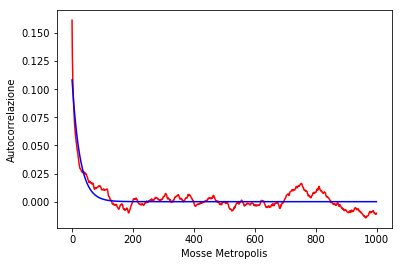

In [13]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

def f(x,A,tc):  # defining the fitting function
    return A * np.exp(-x/tc)

# Importo i dati della energia potenziale per particella.
n, u = np.loadtxt("energia_istantanea_gas.dat", usecols=(0,1), delimiter='   ', unpack='true')
# A questo punto ho negli array i dati della energia potenziale per particella. 

tmax = 10000
t_interest =  1000

# Calcolo il valor medio dell'array.
accu=0
accu2=0
valori=range(0,t_interest)
for i in valori:
    accu = accu + u[i]
    accu2 = accu2 + u[i] * u[i]

# Alla fine divido per il numero di misure.
media = accu/tmax
varianza = accu2/tmax - media * media
print("Valor medio: " + str(media))
print("Varianza: " + str(varianza))



# Da qui calcolo la funzione di autocorrelazione.
chi = np.zeros(t_interest)
n2 = np.zeros(t_interest)
# Ciclo sui valori di t
for t in valori:
    # Range in cui puo' variare t'=tp
    valoriP =  range(0,tmax-t)
    # Queste variabili contengono i risultati delle sommatorie.
    sommatoria1=0
    sommatoria2=0
    sommatoria3=0
    for tp in valoriP:
        sommatoria1 = sommatoria1 + u[tp] * u[tp+t]
        sommatoria2 = sommatoria2 + u[tp]
        sommatoria3 = sommatoria3 + u[tp+t]
    chi[t] = 1/(tmax-t)*sommatoria1 - 1/(tmax-t)*sommatoria2 * 1/(tmax-t)*sommatoria3
    chi[t] = chi[t]/varianza
    n2[t]=t

p_opt, p_cov = curve_fit(f, n2, chi)
print("Valore del tempo di correlazione: " + str(p_opt[1]))
chi_fit = np.zeros(t_interest)
for t in valori:
    chi_fit[t] = f(t,p_opt[0],p_opt[1])

plt.plot(chi, color='r')
plt.plot(chi_fit, color='b')
plt.xlabel("Mosse Metropolis")
plt.ylabel("Autocorrelazione")
plt.show()

## Autocorrelazione pressione

Valor medio: 0.00018473933000000002
Varianza: 8.742327645042152e-06
Valore del tempo di correlazione: 1.1193652820994109


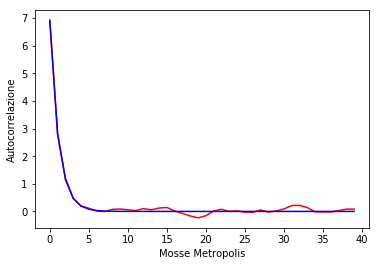

In [14]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

def f(x,A,tc):  # defining the fitting function
    return A * np.exp(-x/tc)

# Importo i dati della energia potenziale per particella.
n, u = np.loadtxt("P_istantanea_gas.dat", usecols=(0,1), delimiter='   ', unpack='true')
# A questo punto ho negli array i dati della energia potenziale per particella. 

tmax = 10000
t_interest =  40

# Calcolo il valor medio dell'array.
accu=0
accu2=0
valori=range(0,t_interest)
for i in valori:
    accu = accu + u[i]
    accu2 = accu2 + u[i] * u[i]

# Alla fine divido per il numero di misure.
media = accu/tmax
varianza = accu2/tmax - media * media
print("Valor medio: " + str(media))
print("Varianza: " + str(varianza))



# Da qui calcolo la funzione di autocorrelazione.
chi = np.zeros(t_interest)
n2 = np.zeros(t_interest)
# Ciclo sui valori di t
for t in valori:
    # Range in cui puo' variare t'=tp
    valoriP =  range(0,tmax-t)
    # Queste variabili contengono i risultati delle sommatorie.
    sommatoria1=0
    sommatoria2=0
    sommatoria3=0
    for tp in valoriP:
        sommatoria1 = sommatoria1 + u[tp] * u[tp+t]
        sommatoria2 = sommatoria2 + u[tp]
        sommatoria3 = sommatoria3 + u[tp+t]
    chi[t] = 1/(tmax-t)*sommatoria1 - 1/(tmax-t)*sommatoria2 * 1/(tmax-t)*sommatoria3
    chi[t] = chi[t]/varianza
    n2[t]=t

p_opt, p_cov = curve_fit(f, n2, chi)
print("Valore del tempo di correlazione: " + str(p_opt[1]))
chi_fit = np.zeros(t_interest)
for t in valori:
    chi_fit[t] = f(t,p_opt[0],p_opt[1])

plt.plot(chi, color='r')
plt.plot(chi_fit, color='b')
plt.xlabel("Mosse Metropolis")
plt.ylabel("Autocorrelazione")
plt.show()

## Studio della dimensione dei blocchi

In [15]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

def error(AV,AV2,n):  # Function for statistical uncertainty estimation
    if n==0:
        return 0
    else:
        return math.sqrt((AV2[n] - AV[n]**2)/n)

    
    
def blocking(arr_ave, quanti_dati):
    # Creo gli appropriati array del blocking.
    sum_prog = np.zeros(quanti_dati)
    su2_prog = np.zeros(quanti_dati)
    err_prog = np.zeros(quanti_dati)
    arr_ave2 = np.zeros(quanti_dati)
    
    # Array delle medie quadrate per blocco.
    for i in range(0,quanti_dati):
        arr_ave2[i] = arr_ave[i] * arr_ave[i]
    
    # print("Terminato calcolo medie quadrate.")
    
    for i in range(quanti_dati):
        for j in range(i+1):
            sum_prog[i] += arr_ave[j] 
            su2_prog[i] += arr_ave2[j] 
        sum_prog[i]/=(i+1) # Cumulative average
        su2_prog[i]/=(i+1) # Cumulative square average
        err_prog[i] = error(sum_prog,su2_prog,i)
        
        #if i % 500 == 0:
        #  print("Terminato calcolo blocking per blocco " + str(i) + ".")
    
    # Ritorna l'ultimo valore dell'errore.
    return err_prog[quanti_dati-1]
        
# Importo i dati della energia potenziale per particella.
n, u = np.loadtxt("energia_istantanea_gas.dat", usecols=(0,1), delimiter='   ', unpack='true')
# A questo punto ho negli array i dati della energia potenziale per particella. 

print("Terminato caricamento dei dati.")

n_data = 100000    # Numero totale di dati.
step_dimensione = 10    # Step dimensione del blocco.
min_dimensione = 10    # Dimensione minima del blocco.
tentativi_dimensione = 100    # Quanti tentativi di blocking devo fare?

# In questo array salvo i risultati man mano ottenuti come errori finali.
arr_risultati = np.zeros(tentativi_dimensione)

# In questo array salvo i valori delle L utilizzati.
arr_L = np.zeros(tentativi_dimensione)

file = open("variazione_con_L_solido.dat","w")

# Questo ciclo cicla sul valore di L (larghezza del blocco)
for i in range(0,tentativi_dimensione):
    # Imposta correttamente la dimensione del blocco in base al tentativo.
    L = min_dimensione + step_dimensione * i
    # Determina quanti blocchi ci sono.
    quanti_blocchi = int(n_data / L)
    print("Con L =" + str(L) + " ho " + str(quanti_blocchi) + " blocchi.")
    
    # Imposta l'array dove salvare le medie.
    arr_ave = np.zeros(quanti_blocchi)
    
    # Questo ciclo cicla sui blocchi.    
    for blk in range(0,quanti_blocchi):
        # Questo ciclo cicla sulle singole misure.
        for mis in range(0,L):
            arr_ave[blk] = arr_ave[blk] + u[mis + blk * L]    # Aggiunge la misura attuale all'accumulatore.
            
        # Alla fine medio.
        arr_ave[blk] = arr_ave[blk]/L
        # Stampo ogni 1000 blocchi.
        # if blk % 1000 == 0:
        #    print("Blocco " + str(blk) + " con L = " + str(L) + " : media fatta.")
    
    # Alla fine ho tutte le medie. La funzione blocking mi restituisce il valore dell'errore.
#    print("Finito blocco con L=" + str(L) + ". Avvio blocking.")
    arr_risultati[i] = blocking(arr_ave, quanti_blocchi)
    arr_L[i] = L
    print("Eseguito tentativo con L=" + str(L) + ":      errore = " + str(arr_risultati[i]))
    file.write(str(arr_L[i]) + "   " + str(arr_risultati[i]) + '\n')
    print("Scritto su file.")

file.close()

Terminato caricamento dei dati.
Con L =10 ho 10000 blocchi.
Eseguito tentativo con L=10:      errore = 0.00042367512402477345
Scritto su file.
Con L =20 ho 5000 blocchi.
Eseguito tentativo con L=20:      errore = 0.0005470035952544822
Scritto su file.
Con L =30 ho 3333 blocchi.
Eseguito tentativo con L=30:      errore = 0.0006296825268559211
Scritto su file.
Con L =40 ho 2500 blocchi.
Eseguito tentativo con L=40:      errore = 0.0006860584009095579
Scritto su file.
Con L =50 ho 2000 blocchi.
Eseguito tentativo con L=50:      errore = 0.0007377288450649146
Scritto su file.
Con L =60 ho 1666 blocchi.
Eseguito tentativo con L=60:      errore = 0.0007789846243466199
Scritto su file.
Con L =70 ho 1428 blocchi.
Eseguito tentativo con L=70:      errore = 0.0008103294744573015
Scritto su file.
Con L =80 ho 1250 blocchi.
Eseguito tentativo con L=80:      errore = 0.0008282654698949397
Scritto su file.
Con L =90 ho 1111 blocchi.
Eseguito tentativo con L=90:      errore = 0.0008672290800613495
Sc

Con L =780 ho 128 blocchi.
Eseguito tentativo con L=780:      errore = 0.0011159745146949011
Scritto su file.
Con L =790 ho 126 blocchi.
Eseguito tentativo con L=790:      errore = 0.0011798444893154623
Scritto su file.
Con L =800 ho 125 blocchi.
Eseguito tentativo con L=800:      errore = 0.0011375849204388385
Scritto su file.
Con L =810 ho 123 blocchi.
Eseguito tentativo con L=810:      errore = 0.001142036947972757
Scritto su file.
Con L =820 ho 121 blocchi.
Eseguito tentativo con L=820:      errore = 0.0012163258121898521
Scritto su file.
Con L =830 ho 120 blocchi.
Eseguito tentativo con L=830:      errore = 0.0011490323259242114
Scritto su file.
Con L =840 ho 119 blocchi.
Eseguito tentativo con L=840:      errore = 0.001125116241134128
Scritto su file.
Con L =850 ho 117 blocchi.
Eseguito tentativo con L=850:      errore = 0.0011343880485132612
Scritto su file.
Con L =860 ho 116 blocchi.
Eseguito tentativo con L=860:      errore = 0.0011214352095974764
Scritto su file.
Con L =870 h

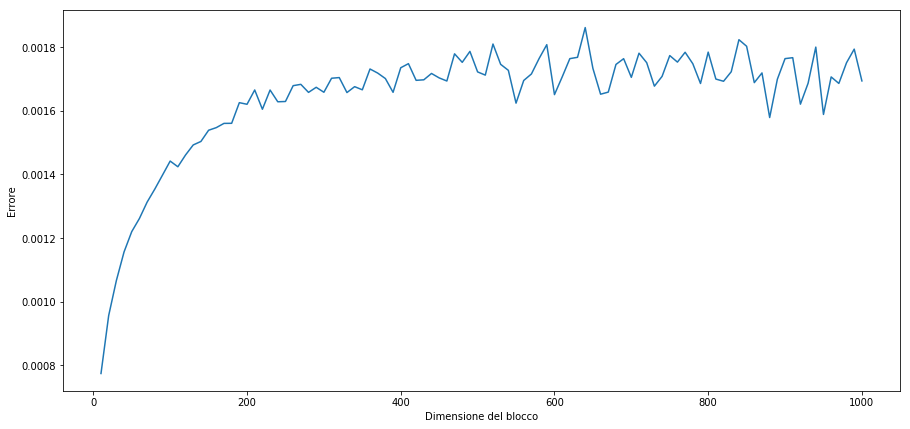

In [16]:
# Visto il notevole tempo di esecuzione del codice precedente, il codice di stampa del grafico è qui.
# I dati del codice precedente vengono salvati su file.

L, err = np.loadtxt("variazione_con_L_gas.dat", usecols=(0,1), delimiter='   ', unpack='true')

fig=plt.figure(figsize=(15,7))

plt.plot(L,err)
plt.xlabel("Dimensione del blocco")
plt.ylabel("Errore")

plt.show()

# La distribuzione radiale #
Modificando il codice fornito, ho proceduto a calcolare la distribuzione radiale, cioè di fatto una misura della distanza tra coppie di particelle nel materiale, normalizzata su quella di un gas perfetto. Il calcolo è stato eseguito con la tecnica della media a blocchi nei tre stati di aggregazione, con i valori di avvio coincidenti con quelli forniti in precedenza. La dimensione dei blocchi da usare per i $10^5$ passi Metropolis considerati in ciascun caso è quella desunta dal grafico dell'errore in funzione della dimensione del blocco analizzato in precedenza.

In ogni grafico ho riportato anche la distribuzione radiale ottenuta a partire da una simulazione con l'algoritmo Molecular Dynamics di un materiale in condizioni equivalenti. Osservo che (salvo per i gas, dove il Molecular Dynamics è particolarmente in difficoltà) la sovrapposizione è ottima.

## Stato solido

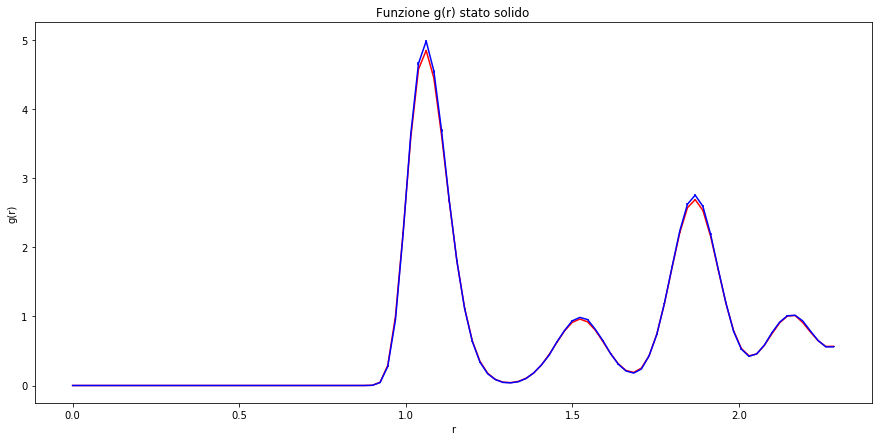

In [17]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

r, g, err = np.loadtxt("funzioneG_solido.dat", usecols=(0,2,3), delimiter='   ', unpack='true')
r2, g2, err2 = np.loadtxt("MD_funzioneG_solido.dat", usecols=(0,1,2), delimiter='   ', unpack='true')

fig=plt.figure(figsize=(15,7))

plt.errorbar(r,g,yerr=err, color='r')
plt.errorbar(r2,g2,yerr=err2, color='b')
plt.xlabel("r")
plt.ylabel("g(r)")
plt.title("Funzione g(r) stato solido")

plt.show()

## Stato liquido

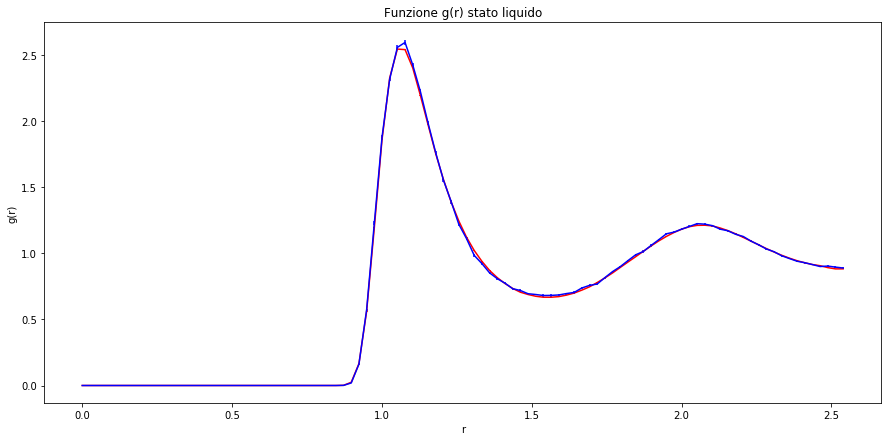

In [18]:
r, g, err = np.loadtxt("funzioneG_liquido.dat", usecols=(0,2,3), delimiter='   ', unpack='true')
r2, g2, err2 = np.loadtxt("MD_funzioneG_liquido.dat", usecols=(0,1,2), delimiter='   ', unpack='true')


fig=plt.figure(figsize=(15,7))

plt.errorbar(r,g,yerr=err, color='r')
plt.errorbar(r2,g2,yerr=err2, color='b')
plt.xlabel("r")
plt.ylabel("g(r)")
plt.title("Funzione g(r) stato liquido")

plt.show()

## Stato gassoso

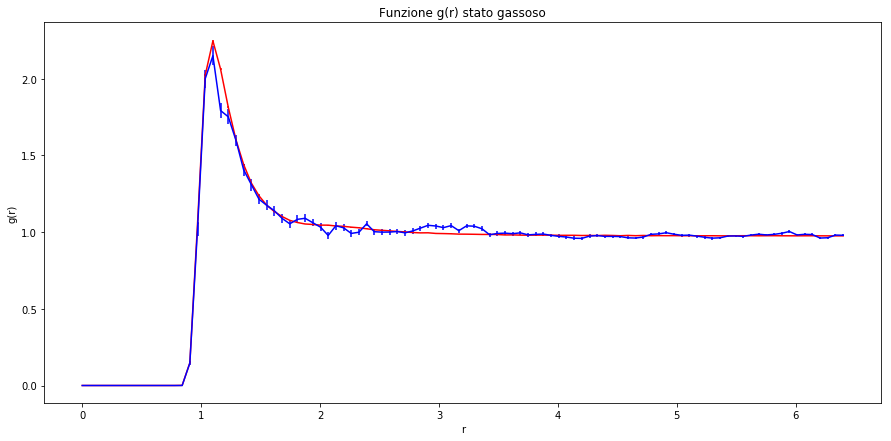

In [19]:
r, g, err = np.loadtxt("funzioneG_gas.dat", usecols=(0,2,3), delimiter='   ', unpack='true')
r2, g2, err2 = np.loadtxt("MD_funzioneG_gas.dat", usecols=(0,1,2), delimiter='   ', unpack='true')

fig=plt.figure(figsize=(15,7))

plt.errorbar(r,g,yerr=err, color='r')
plt.errorbar(r2,g2,yerr=err2, color='b')
plt.xlabel("r")
plt.ylabel("g(r)")
plt.title("Funzione g(r) stato gassoso")

plt.show()

# Misure in unità del Sistema Internazionale #
Con l'algoritmo di Molecular Dynamics erano state calcolate quantità di interesse fisico per due sistemi reali, cioè argon e krypton. Riporto qui i valori nelle unità del Sistema Internazionale ottenuti con Molecular Dynamics e con la simulazione Metropolis dell'argon allo stato solido. I parametri di Lennard-Jones (che permettono di passare in unità del SI) per l'argon sono: $\epsilon = (120 K) \cdot k_B$,   $\sigma = 0.34 nm$.

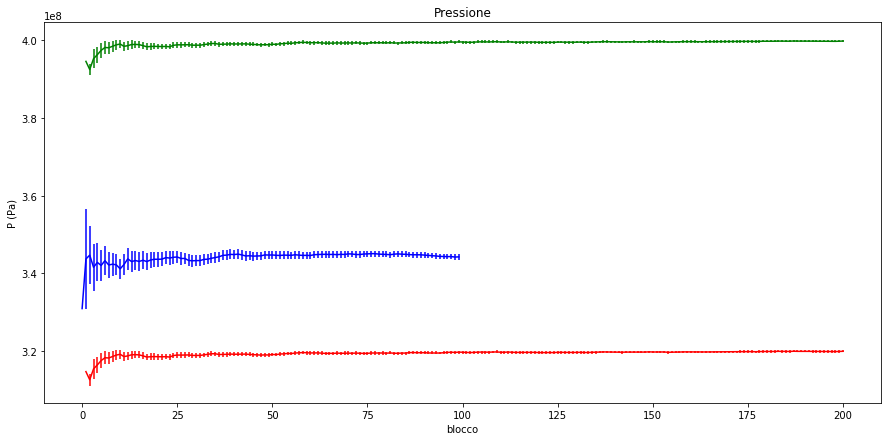

In [21]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

boltzmann = 1.38065e-23
epsilon = 120 * boltzmann
sigma = 0.34e-9

fig=plt.figure(figsize=(15,7))

quanti_dati_MC = 200
quanti_dati_MD = 100

x, y, err = np.loadtxt("MC_solido_press.out", usecols=(0,2,3), delimiter='   ', unpack='true')
x2,y2,err2 = np.loadtxt("MD_solido_press.out", usecols=(0,1,2), delimiter='   ', unpack='true')
x3, y3, err3 = np.loadtxt("MC_solido_press_notail.out", usecols=(0,2,3), delimiter='   ', unpack='true')

for i in range(0,quanti_dati_MC):
    y[i]=y[i] * epsilon / sigma**3
    err[i]=err[i] * epsilon / sigma**3
for i in range(0,quanti_dati_MD):
    y2[i]=y2[i] * epsilon / sigma**3
    err2[i]=err2[i] * epsilon / sigma**3
for i in range(0,quanti_dati_MC):
    y3[i]=y3[i] * epsilon / sigma**3
    err3[i]=err3[i] * epsilon / sigma**3

plt.errorbar(x,y,yerr=err, color='r')
plt.errorbar(x2,y2,yerr=err2, color='b')
plt.errorbar(x3,y3,yerr=err3, color='g')
plt.xlabel("blocco")
plt.ylabel("P (Pa)")
plt.title("Pressione")

plt.show()

Osservo che i dati ottenuti con algoritmo Molecular Dynamics sono compresi tra quelli ottenuti con Montecarlo considerando le correzioni di coda e quelli ottenuti da Montecarlo trascurando le correzioni di coda.

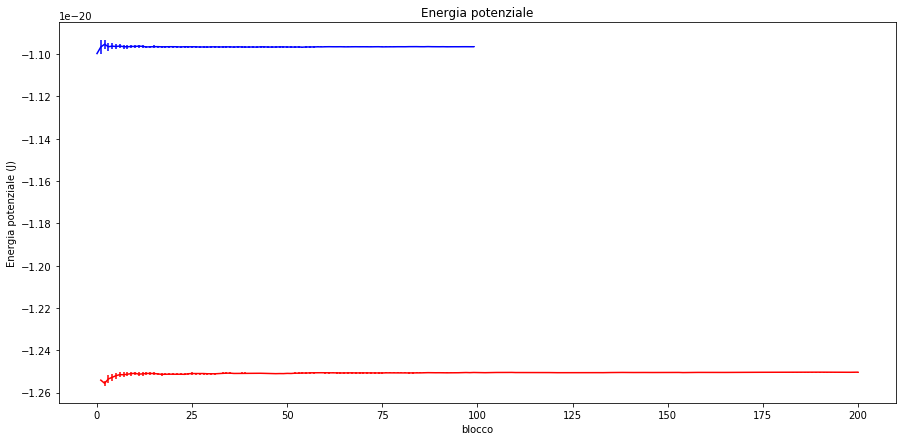

In [22]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

boltzmann = 1.38065e-23
epsilon = 120 * boltzmann
sigma = 0.34e-9

fig=plt.figure(figsize=(15,7))

quanti_dati_MC = 200
quanti_dati_MD = 100

x, y, err = np.loadtxt("MC_solido_epot.out", usecols=(0,2,3), delimiter='   ', unpack='true')
x2,y2,err2 = np.loadtxt("MD_solido_epot.out", usecols=(0,1,2), delimiter='   ', unpack='true')

for i in range(0,quanti_dati_MC):
    y[i]=y[i] * epsilon 
    err[i]=err[i] * epsilon 
for i in range(0,quanti_dati_MD):
    y2[i]=y2[i] * epsilon 
    err2[i]=err2[i] * epsilon 

plt.errorbar(x,y,yerr=err, color='r')
plt.errorbar(x2,y2,yerr=err2, color='b')
plt.xlabel("blocco")
plt.ylabel("Energia potenziale (J)")
plt.title("Energia potenziale")

plt.show()